In [1]:
# Dependencies
import random
import pandas as pd
from citipy import citipy
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#config
from config import api_key
from pprint import pprint


In [2]:
#get the list of random city longitudes
cityCoord_df = pd.DataFrame()
cities = [] #is a new empty list
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

for i in range(2000):
    try:
        #Create the random lat-lon
        city_lon = random.uniform(-180,180)
        city_lat = random.uniform(-90,90)
        cityCoord_df.set_value(i, "Lon", city_lon)
        cityCoord_df.set_value(i, "Lat", city_lat)
        cityCoord_df.set_value(i, "City nbr", i)
        #Get the city name of nearest the lat-lon
        cities.append(citipy.nearest_city(city_lat, city_lon))
        city = cities[i]
        name = city.city_name
        cityCoord_df.set_value(i, "City", name)
        print('Fetching city nbr ', i, ' - ', name)
        #Get the weather information we are looking for
        current_weather = owm.get_current(name, **settings)
        #set the values in the dataframe
        cityCoord_df.set_value(i, "wind", current_weather['wind']['speed'])
        cityCoord_df.set_value(i, "temp", current_weather['main']['temp'])
        cityCoord_df.set_value(i, "humidity", current_weather['main']['humidity'])
        cityCoord_df.set_value(i, "clouds", current_weather['clouds']['all'])
    except:
        print("Oops, no weather for that city")

# drop the cities with no weather data        
cityCoord_df = cityCoord_df.dropna()
#drop the duplicate cities
cityCoord_df.drop_duplicates('City', inplace = True)     
      

Fetching city nbr  0  -  milingimbi
Oops, no weather for that city
Fetching city nbr  1  -  bluff
Fetching city nbr  2  -  busselton
Fetching city nbr  3  -  rikitea
Fetching city nbr  4  -  narsaq
Fetching city nbr  5  -  bethel
Fetching city nbr  6  -  busselton
Fetching city nbr  7  -  warqla
Oops, no weather for that city
Fetching city nbr  8  -  avarua
Fetching city nbr  9  -  port augusta
Fetching city nbr  10  -  arauca
Fetching city nbr  11  -  hofn
Fetching city nbr  12  -  albany
Fetching city nbr  13  -  saint anthony
Fetching city nbr  14  -  tabialan
Oops, no weather for that city
Fetching city nbr  15  -  attawapiskat
Oops, no weather for that city
Fetching city nbr  16  -  mataura
Fetching city nbr  17  -  qaanaaq
Fetching city nbr  18  -  belushya guba
Oops, no weather for that city
Fetching city nbr  19  -  carnarvon
Fetching city nbr  20  -  tuatapere
Fetching city nbr  21  -  hamilton
Fetching city nbr  22  -  punta arenas
Fetching city nbr  23  -  tenenkou
Fetching 

In [ ]:
# print(cityCoord_df.columns)
# cityCoord_df = cityCoord_df.City.unique()
# type(cityCoord_df)
#cityCoord_df = cityCoord_df['City'].unique()
# cityCoord_df = cities
#cityCoord_df.description
#type(cityCoord_df)

In [3]:
cityCoord_df.count()

Lon         650
Lat         650
City nbr    650
City        650
wind        650
temp        650
humidity    650
clouds      650
dtype: int64

Build scatter plots
1. Temp v lat
2. Humidity v lat
3. Cloudiness v lat
4. Wind speed v lat

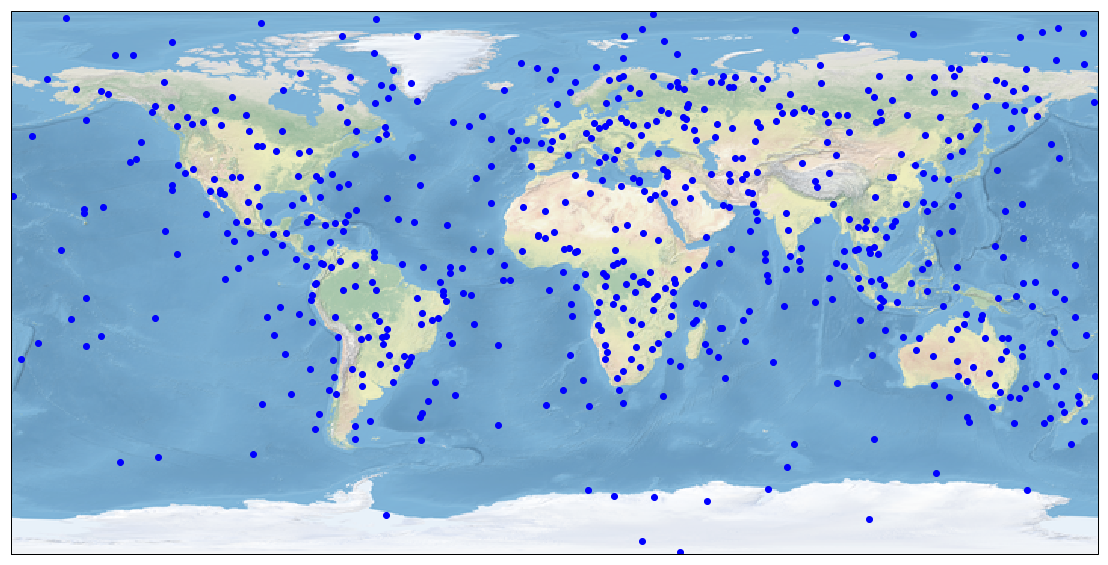

In [4]:
# plot out the world map with locations

fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(list(cityCoord_df['Lon']),list(cityCoord_df['Lat']),color='blue', marker='o',transform=ccrs.Geodetic(),)
plt.savefig("worldCities.png")
plt.show()

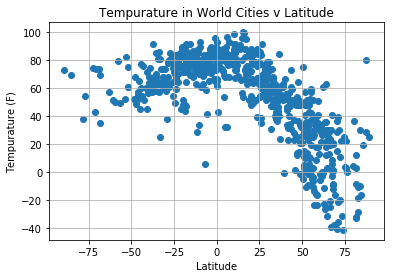

In [5]:
# Build a scatter plot for temp v lat
plt.scatter(cityCoord_df["Lat"], cityCoord_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Tempurature in World Cities v Latitude")
plt.ylabel("Tempurature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("tempLat.png")

# Show plot
plt.show()

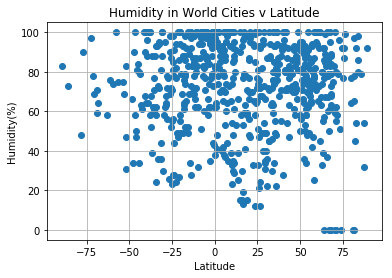

In [6]:
# Build a scatter plot for Humidity v Lat
plt.scatter(cityCoord_df["Lat"], cityCoord_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities v Latitude")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("humdityLat.png")

# Show plot
plt.show()

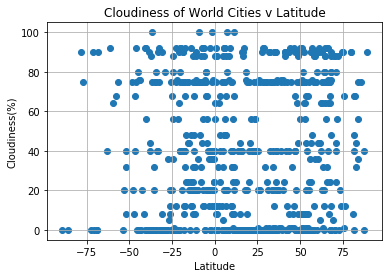

In [7]:
# Build a scatter plot for Cloudiness v Lat
plt.scatter(cityCoord_df["Lat"], cityCoord_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness of World Cities v Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cloudyLat.png")

# Show plot
plt.show()

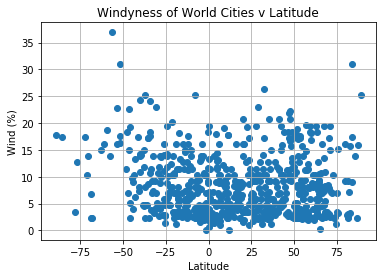

In [8]:
# Build a scatter plot for Windspeed v Lat
plt.scatter(cityCoord_df["Lat"], cityCoord_df["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Windyness of World Cities v Latitude")
plt.ylabel("Wind (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("windLat.png")

# Show plot
plt.show()

In [ ]:
# Save Dataframe of city data to csv
cityCoord_df.to_csv('CityWeather.csv', encoding='utf-8')